# Tecnicas
* Kmenas
* Jerarquico
* DBSsacn
* GMM

# Librerias

In [32]:
#Manipulacion de datos
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs

#Graficos
import seaborn as sb
import matplotlib.pyplot as plt

#Modelado y preprocesamiento
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from itertools import product

#validacion
from sklearn.metrics import silhouette_score

#configuracion 
import warnings
warnings.filterwarnings('ignore')

# Simulacion de datos

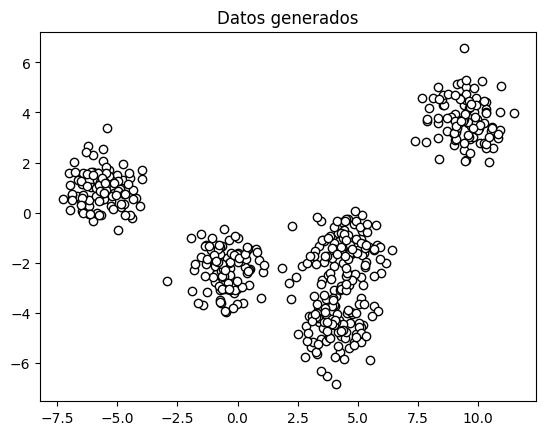

In [33]:
X, y = make_blobs(n_samples=500, centers=5, n_features=2, cluster_std=0.8,shuffle=True, random_state=123)
plt.scatter(X[:,0], X[:,1], c='white', edgecolor='black')
plt.title('Datos generados')
plt.show()

## KMeans
**params**

- n_clusters= cantidad de k
- init= indica la estrategia para asignar los centors, default k means++ (aleja lo mas posible los centros iniciales)
- n_init= determina la cantidad de veces que se repite el algoritmos, se estima entre 10 y 25
- random_state= semilla de replicabilidad

Esquema de inercia (metodo de codo)

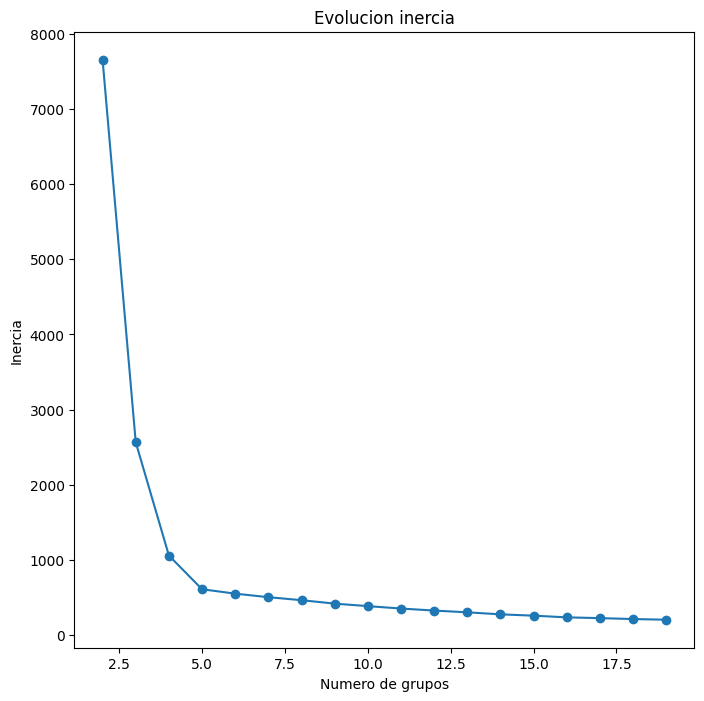

In [34]:
range_n_clusters = range(2, 20)
inertia = []
for n_clusters in range_n_clusters:
    kmeans_model = KMeans(n_clusters=n_clusters,
                    n_init=20,
                    random_state=123)
    kmeans_model.fit(X)
    inertia.append(kmeans_model.inertia_)
plt.figure(figsize=(8,8))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Evolucion inercia')
plt.xlabel('Numero de grupos')
plt.ylabel('Inercia')
plt.show()

Esquema de silhouette

Numero de grupos:  3 Silhouette:  0.6504766368084122
Numero de grupos:  4 Silhouette:  0.6797157392918288
Numero de grupos:  5 Silhouette:  0.6708549587603788
Numero de grupos:  6 Silhouette:  0.6055760317439738
Numero de grupos:  7 Silhouette:  0.515455838668159


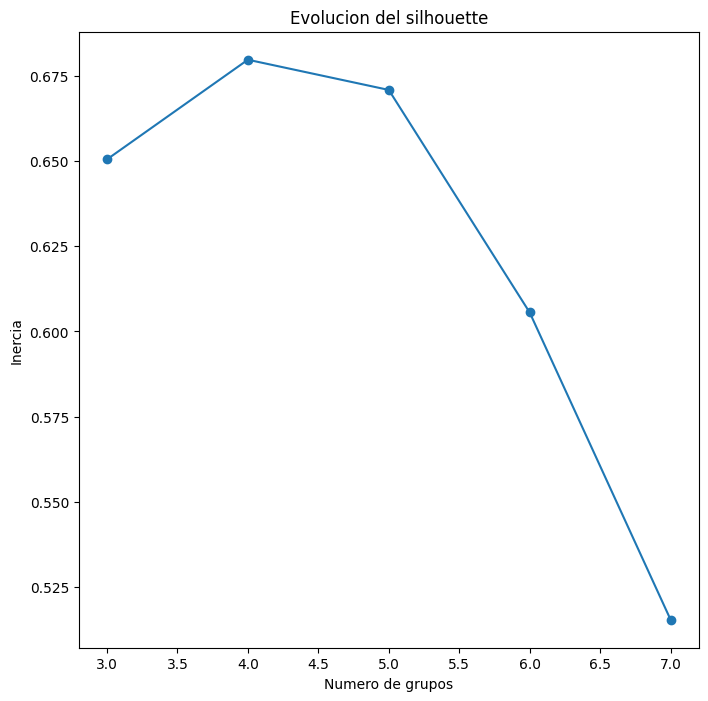

In [35]:
range_n_clusters= range(3,8)
sil_score=[]
for n_clusters in range_n_clusters:
    kmeans_model = KMeans(n_clusters=n_clusters,
                    n_init=20,
                    random_state=123)
    kmeans_model.fit(X)
    cluster_labels = kmeans_model.fit_predict(X)
    sil_avg = silhouette_score(X, cluster_labels)
    sil_score.append(sil_avg)  
    print('Numero de grupos: ', n_clusters, 'Silhouette: ', sil_avg)

plt.figure(figsize=(8,8))
plt.plot(range_n_clusters, sil_score, marker='o')
plt.title('Evolucion del silhouette')
plt.xlabel('Numero de grupos')
plt.ylabel('Inercia')
plt.show()

In [36]:
kmeans_model = KMeans(n_clusters=4, n_init=20, random_state=123)
kmeans_model.fit(X)

KMeans(n_clusters=4, n_init=20, random_state=123)

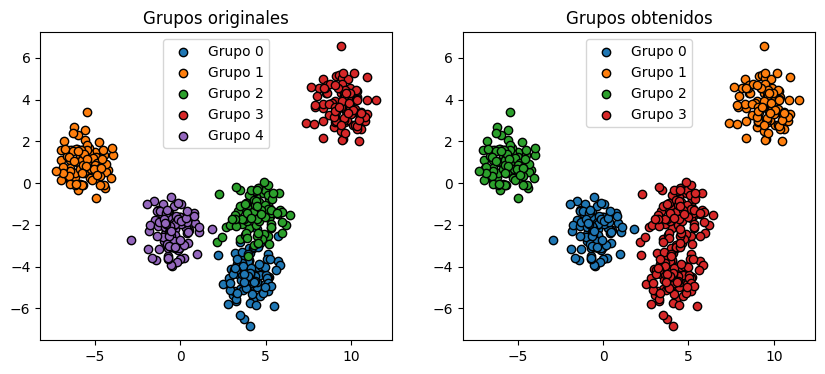

In [37]:
label=kmeans_model.predict(X)
fig, ax= plt.subplots(1,2,figsize=(10,4))
for i in np.unique(y):
    ax[0].scatter(
        X[y==i,0],
        X[y==i,1],
        c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker='o',
        edgecolor='black',
        label=f'Grupo {i}')
ax[0].set_title('Grupos originales')
ax[0].legend()

for i in np.unique(label):
    ax[1].scatter(
        X[label==i,0],
        X[label==i,1],
        c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker='o',
        edgecolor='black',
        label=f'Grupo {i}')  
ax[1].set_title('Grupos obtenidos')
ax[1].legend()
plt.show()

## Aglomerativo


- n_clsters: determina la cantidad de grupos, si se quiere construir un dendrograma, se utiliza NONE como param
- distance_threshold: determina la distancia maxima entre dos puntos para ser considerados vecinos
- metric: mecanismo de distancia utilizado
- linkage: mecanismo de asosiacion entre pares

In [38]:
from scipy.cluster.hierarchy import dendrogram
#Funcion oara dibujar dendrograma
def dibujar_dendrograma(model, **kwargs):
    counts  = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

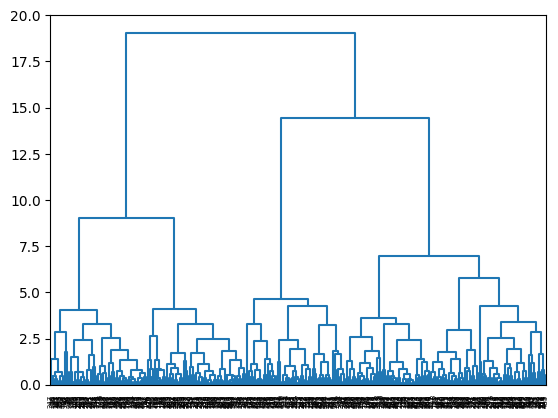

In [39]:
hclust_complete = AgglomerativeClustering(metric='euclidean',
                                        linkage='complete',
                                        n_clusters=None,
                                        distance_threshold=0)
hclust_complete.fit(X)
dibujar_dendrograma(hclust_complete, color_threshold=0)

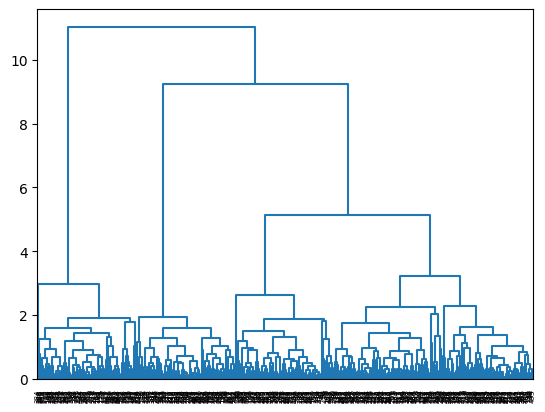

In [40]:
hclust_average= AgglomerativeClustering(metric='euclidean',
                                        linkage='average',
                                        n_clusters=None,
                                        distance_threshold=0)
hclust_average.fit(X)
dibujar_dendrograma(hclust_average, color_threshold=0)

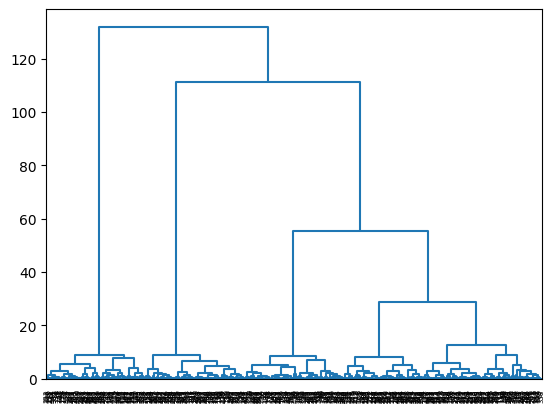

In [41]:
hclust_ward= AgglomerativeClustering(metric='euclidean',
                                        linkage='ward',
                                        n_clusters=None,
                                        distance_threshold=0)
hclust_ward.fit(X)
dibujar_dendrograma(hclust_ward, color_threshold=0)

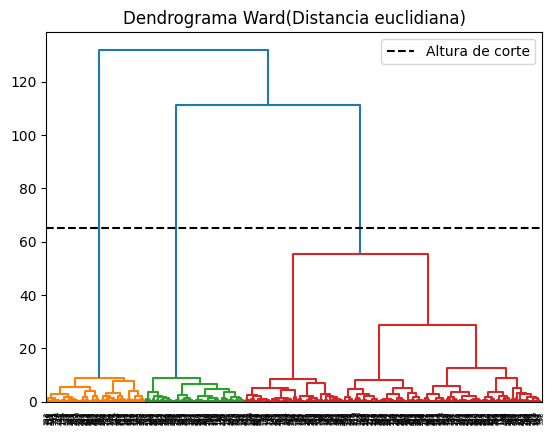

In [42]:
pruning_cut = 65
dibujar_dendrograma(hclust_ward, color_threshold=pruning_cut)
plt.title('Dendrograma Ward(Distancia euclidiana)')
plt.axhline(y=pruning_cut, c='black',linestyle='--',label='Altura de corte')
plt.legend()
plt.show()

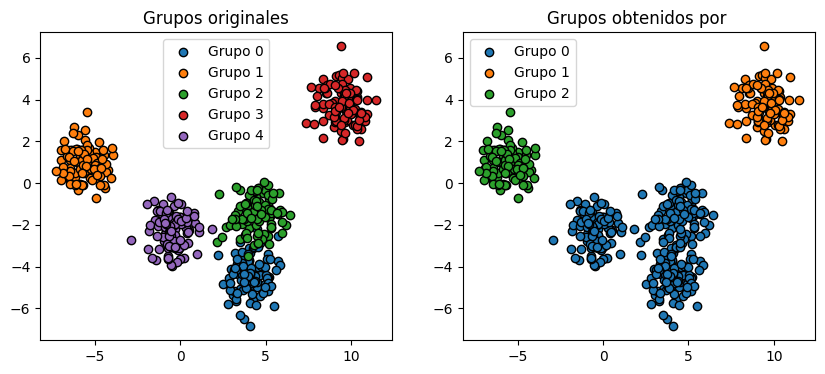

In [59]:
agg_model = AgglomerativeClustering(metric='euclidean',
                                    linkage='ward',
                                    n_clusters=3)

label=agg_model.fit_predict(X)
fig, ax= plt.subplots(1,2,figsize=(10,4))
for i in np.unique(y):
    ax[0].scatter(
        X[y==i,0],
        X[y==i,1],
        c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker='o',
        edgecolor='black',
        label=f'Grupo {i}')
ax[0].set_title('Grupos originales')
ax[0].legend()

for i in np.unique(label):
    ax[1].scatter(
        X[label==i,0],
        X[label==i,1],
        c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker='o',
        edgecolor='black',
        label=f'Grupo {i}')  
ax[1].set_title('Grupos obtenidos por ')
ax[1].legend()
plt.show()

# Metodos por densidad

# **DBSCSN**

- eps: radio de vecindad (epsilon)
- min_samples: vecindad o cantidad minima de individuos para determinar una vecindad

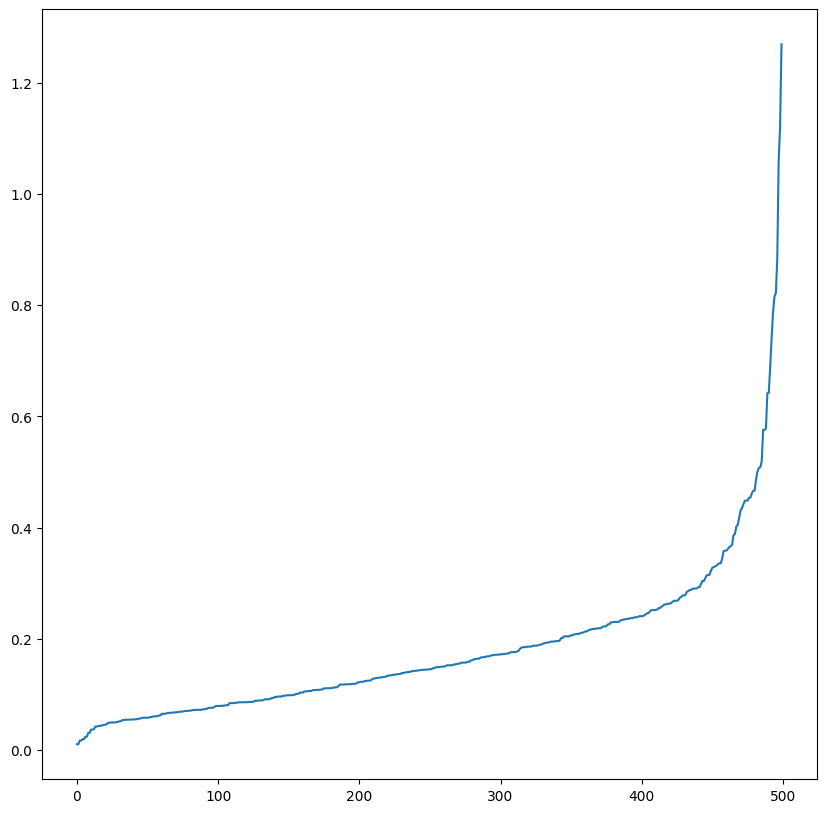

In [ ]:
# Identificar el rango de existencia de epsilon
neighbors= NearestNeighbors(n_neighbors=3)
neighbors_fit= neighbors.fit(X)
distance,index= neighbors_fit.kneighbors(X)
distance= np.sort(distance, axis=0)
distance= distance[:,1]
plt.figure(figsize=(10,10))
plt.plot(distance)
plt.show()

In [56]:
eps_value=np.arange(0.4,1.4,0.1)
min_samples=np.arange(2,11)
dbscan_params= list(product(eps_value, min_samples))
sil_score=[]
for p in dbscan_params:
    label=DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(X)
    sil_score.append(silhouette_score(X, label))


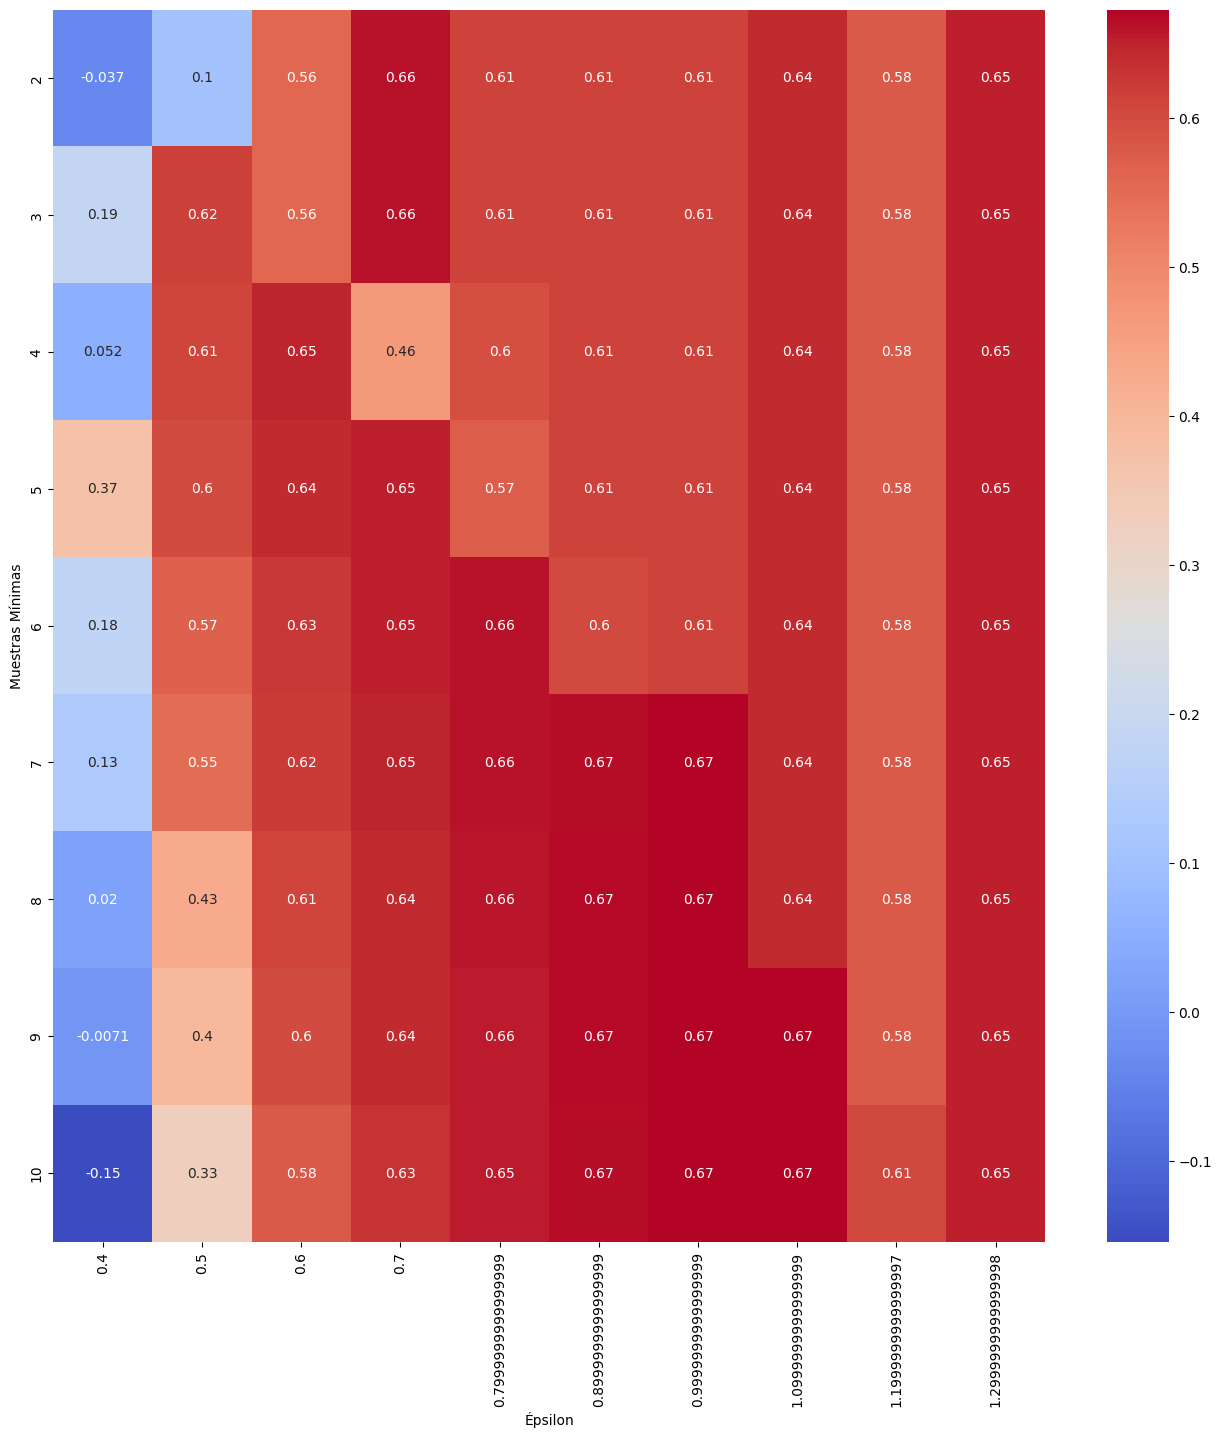

In [57]:
# Heat map
dbscan_params_adj=pd.DataFrame.from_records(dbscan_params, columns=['Épsilon','Muestras Mínimas'])
dbscan_params_adj['Score']=sil_score
pivot_data=pd.pivot_table(dbscan_params_adj, values='Score', index='Muestras Mínimas', columns='Épsilon')
plt.figure(figsize=(16,16))
sb.heatmap(pivot_data, annot=True, fmt='.2g',cmap='coolwarm')
plt.show()

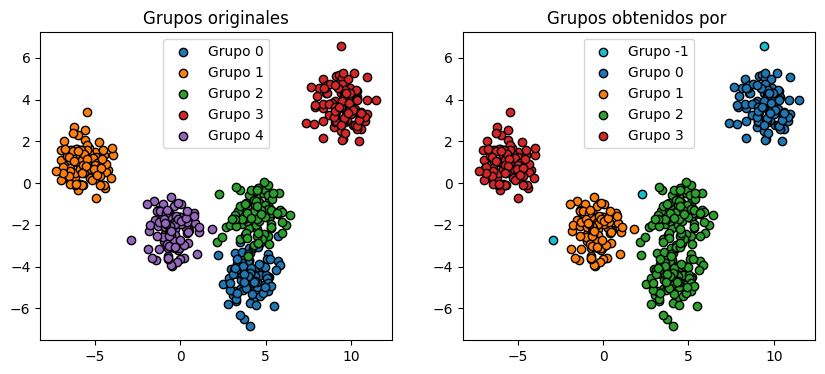

In [60]:
bbsan_model = DBSCAN(eps=1, min_samples=7)

label=bbsan_model.fit_predict(X)
fig, ax= plt.subplots(1,2,figsize=(10,4))
for i in np.unique(y):
    ax[0].scatter(
        X[y==i,0],
        X[y==i,1],
        c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker='o',
        edgecolor='black',
        label=f'Grupo {i}')
ax[0].set_title('Grupos originales')
ax[0].legend()

for i in np.unique(label):
    ax[1].scatter(
        X[label==i,0],
        X[label==i,1],
        c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker='o',
        edgecolor='black',
        label=f'Grupo {i}')  
ax[1].set_title('Grupos obtenidos por ')
ax[1].legend()
plt.show()

In [61]:
# **Identificacion del mejor grupo de modelos**
labels_kmeans=kmeans_model.predict(X)
labels_agg=agg_model.fit_predict(X)
labels_dbscan=bbsan_model.fit_predict(X)

sil_kmeans=silhouette_score(X, labels_kmeans)
sil_agg=silhouette_score(X, labels_agg)
sil_dbscan=silhouette_score(X, labels_dbscan)

print('Silhouette Kmeans: ', sil_kmeans)
print('Silhouette Agglomerative: ', sil_agg)
print('Silhouette DBSCAN: ', sil_dbscan)

Silhouette Kmeans:  0.6797157392918288
Silhouette Agglomerative:  0.6517971803322744
Silhouette DBSCAN:  0.672828614388597


In [62]:
kmeans_model.cluster_centers_

array([[-0.45914783, -2.26263491],
       [ 9.46317526,  3.7366488 ],
       [-5.61318822,  0.96134082],
       [ 4.28130139, -2.93311405]])